In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
import scipy.optimize as opt

In [2]:
file=scipy.io.loadmat('D:/ML Andrew Ngs/Week4/machine-learning-ex3/ex3/ex3data1.mat')

In [3]:
# First part of training data consist of grey scale image of 20X20 pixel.So X will be (5000,400) matrix
# Second part of training data consist of numbers from 0 to 9 
print('Shape of input X is {}'.format(file['X'].shape))
print('Shape of output Y is {}'.format(file['y'].shape))

Shape of input X is (5000, 400)
Shape of output Y is (5000, 1)


In [4]:
X= file['X']
Y= file['y']

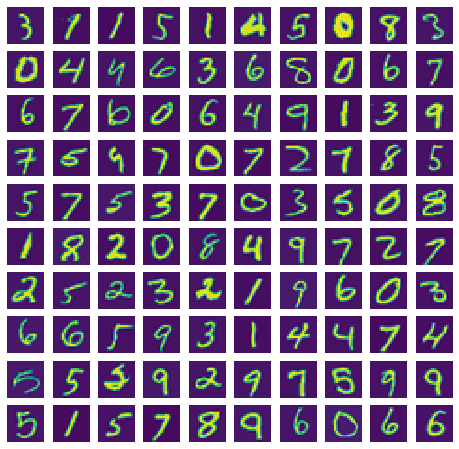

In [5]:
fig,ax=plt.subplots(nrows=10,ncols=10,figsize=(8,8))
#fig=plt.figure(figsize=(5,5))
for i in range(10):
    for j in range(10):
        ran=np.random.randint(X.shape[0])
        # We need to reshape our randomly selected row in (20,20) as our image data is 20X20 pixel
        # Here order of reshape does matter order='F' will give correct output of image
        ax[i,j].imshow(X[ran].reshape((20,20),order='F'))         
        ax[i,j].axis('off')

In [6]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
m=X.shape[0]
n=X.shape[1]
k=10 # no of classes

In [7]:
def sigmoid(X,theta):
    z=np.dot(X,theta)
    return(1/(1+np.exp(-z)))

In [8]:
def costFunctionReg(theta, X, Y, lmbda):
    h=sigmoid(X,theta)
    cost = -1/(m)*(np.dot(Y,np.log(h))+np.dot((1-Y),np.log(1-h)))
    reg = lmbda/(2*m)*np.sum(theta[1:]**2)
    J = cost+reg
    return(J)

In [9]:
def gradRegularization(theta, X, Y, lmbda):
    temp = sigmoid(X,theta) - Y
    grad = np.dot(temp.T, X)/ m 
    grad[1:] = grad[1:] + theta[1:] * lmbda / m
    return (grad)

Here optimiser used is opt.fmin_cg instead of opt.fmin_tnc. 
Both the optimiser works same but in opt.fmin_cg we can pass number of iteration needed. iteration used is 50

In [10]:
lmbda = 0.1
theta_t = np.zeros((n,k)) #inital parameters
for i in range(0,k):
    if i!=0:
        theta_t[:,i]= opt.fmin_cg(f = costFunctionReg, x0 = theta_t[:,i],  fprime = gradRegularization, args = (X, (Y == i).flatten(), lmbda), maxiter = 50)
    else:
        theta_t[:,i]= opt.fmin_cg(f = costFunctionReg, x0 = theta_t[:,i],  fprime = gradRegularization, args = (X, (Y == 10).flatten(), lmbda), maxiter = 50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.013846
         Iterations: 50
         Function evaluations: 186
         Gradient evaluations: 186
         Current function value: 0.057469
         Iterations: 50
         Function evaluations: 141
         Gradient evaluations: 141
         Current function value: 0.061953
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037406
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063387
         Iterations: 50
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.020029
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033174
      

In [11]:
# Measuring Accuracy

In [12]:
predict=sigmoid(X,theta_t)
predict=np.argmax(predict,axis=1)
pred=predict.reshape((m,1))
pred[pred==0]=10 # Replace numpy value wherever it is 0
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == Y) * 100))

Training Set Accuracy: 95.1%
